# Week 3 Regression Project
## Capital Bikeshare


### Table of Contents
1. Objective of the Project
2. Data Collection
    - Define Labels
3. Exploratory Data Analysis and Feature Engineering
    - Visualize basic data
    - Extracting the details of Datetime
    - Multivariate analysis
    - One hot coding for Season and Weather
    - Dealing with outlier (???)
    - Concat added columns and drop columns not needed
4. Split Dataset to X and Y Variables
5. Models
    - Linear Regression (Baseline model)
    - Cross Validation
    - Optimization
        - Scaling (???)
        - Feature Expansion: Polynomial Linear Regression
        - Ridge Regression
        - Lasso Regression
        - Random Forest Regressor
        - Decision Tree Regressor

### 1. Objective of the Project

This project aims to effectively predict the demand of rental-bikes in any time-period using Regression model. 


![cbike](bikeshare1.jpg)


source: https://www.govtech.com/dc/articles/What-We-Can-Learn-from-Washington-DCs-Broken-Bikeshare-Program.html


### 2. Data Collection


In [1]:
import pandas as pd
import numpy as np

# Plotting

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from scipy.stats import norm

# sklearn environment
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

In [2]:
bike_train = pd.read_csv('cbtrain.csv')
bike_train 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### Defining the Labels
Independent Variables:
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed

Dependent Variables: 
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

### 3. Exploratory Data Analysis and Feature Engineering

In [3]:
bike_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
bike_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

#### Visualization


##### Dependent Variable 'Count'


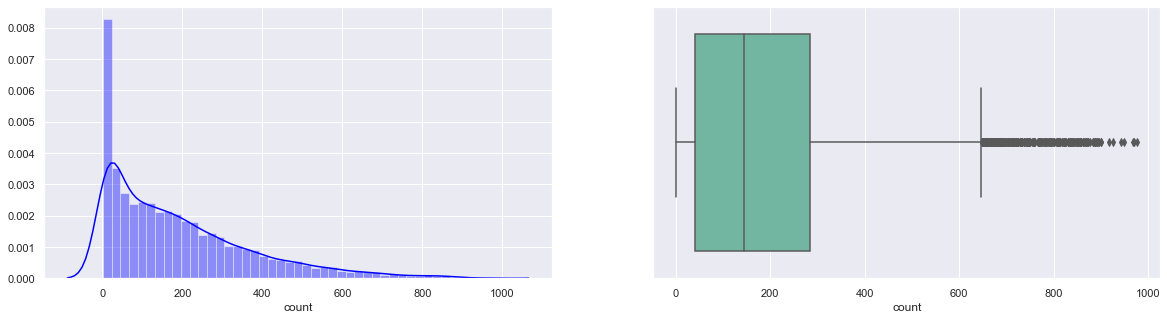

In [5]:

plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(bike_train['count'], color='blue' )

plt.subplot(122)
sns.boxplot(y='count', orient = 'h', palette= 'Set2', data =bike_train)


##### Season,  Weather, Holidays and Working Days

[Text(0, 0, 'Fair'),
 Text(0, 0, 'Misty'),
 Text(0, 0, 'Rainy'),
 Text(0, 0, 'Stormy')]

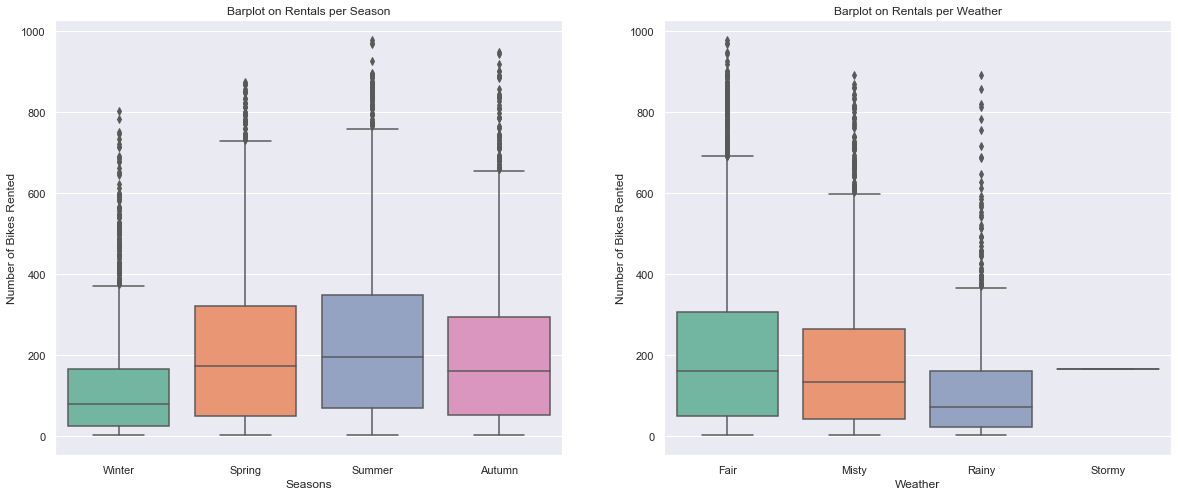

In [6]:
plt.figure(figsize=(20,8))
plt.subplot(121)
ax = sns.boxplot(x='season', y='count', palette ='Set2' ,  data=bike_train)
ax.set(title = 'Barplot on Rentals per Season', xlabel='Seasons', ylabel='Number of Bikes Rented')
ax.set_xticklabels(['Winter', 'Spring', 'Summer', 'Autumn'])

plt.subplot(122)
ax = sns.boxplot(x='weather', y='count', palette ='Set2' ,  data=bike_train)
ax.set(title = 'Barplot on Rentals per Weather', xlabel='Weather', ylabel='Number of Bikes Rented')
ax.set_xticklabels(['Fair','Misty','Rainy','Stormy'])

[Text(0, 0, 'Non-holiday'), Text(0, 0, 'Holiday')]

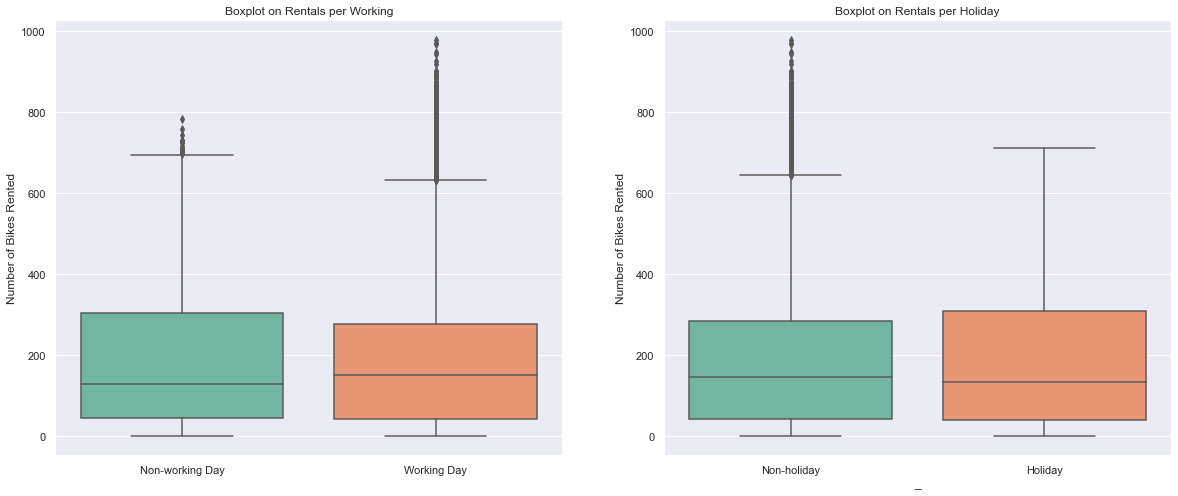

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(121)
ax = sns.boxplot(x='workingday', y='count', palette ='Set2' ,  data=bike_train)
ax.set(title = 'Boxplot on Rentals per Working', xlabel=' ', ylabel='Number of Bikes Rented')
ax.set_xticklabels(['Non-working Day','Working Day'])

plt.subplot(122)
ax = sns.boxplot(x='holiday', y='count', palette ='Set2' ,  data=bike_train)
ax.set(title = 'Boxplot on Rentals per Holiday', xlabel='_', ylabel='Number of Bikes Rented')
ax.set_xticklabels(['Non-holiday','Holiday'])


##### Temperature, Windspeed and Humidity Correlation

In [8]:
tawh_corr = bike_train[['count', 'temp','humidity', 'windspeed']].corr()
tawh_corr

,count,temp,humidity,windspeed
count,1.000000,0.394454,-0.317371,0.101369
temp,0.394454,1.000000,-0.064949,-0.017852
humidity,-0.317371,-0.064949,1.000000,-0.318607
windspeed,0.101369,-0.017852,-0.318607,1.000000


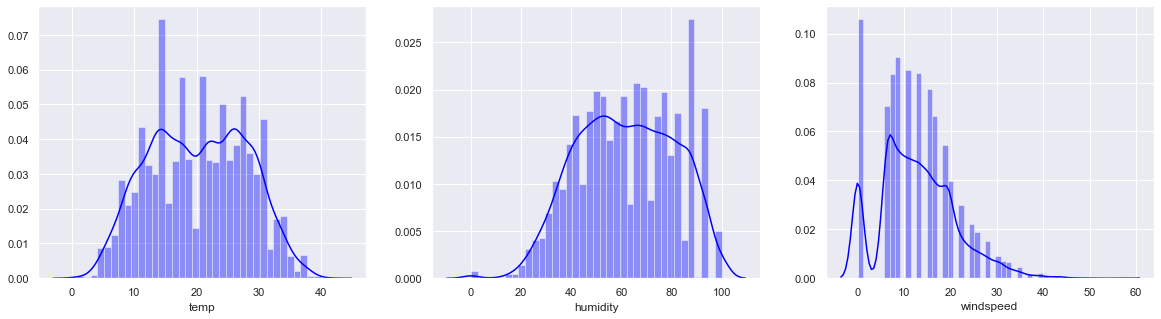

In [9]:
plt.figure(figsize=(20,5))

plt.subplot(131)
#sns.lineplot(x="temp", y="count", data=bike_train)
sns.distplot(bike_train['temp'], color='Blue' )
plt.subplot(132)
#sns.lineplot(x="humidity", y="count", data=bike_train)
sns.distplot(bike_train['humidity'], color='Blue' )
plt.subplot(133)
#sns.lineplot(x="windspeed", y="count", data=bike_train)
sns.distplot(bike_train['windspeed'], color='Blue' )



### Extracting the details of datetime

In [10]:
bike_train = pd.read_csv('cbtrain.csv')


In [11]:
def breakdown_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['dow'] = df['datetime'].dt.weekday
    df['week'] = df['datetime'].dt.week
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    df['weekend'] = (df.dow >= 5).astype(int)
breakdown_datetime(bike_train)


In [12]:
def clarify_seasons(df):
    df['season'] = df['season'].astype(str)
    df['season'] = df['season'].replace(to_replace=['1','2','3','4'],value=['Winter', 'Spring', 'Summer', 'Autumn'])
    return df

In [13]:
def clarify_weather(df):
    df['weather'] = df['weather'].astype(str)
    df['weather'] = df['weather'].replace(to_replace=['1','2','3','4'],value=['Fair','Misty','Rainy','Stormy'])
    return df

In [14]:
breakdown_datetime(bike_train)
bike_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,dow,week,month,year,weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,5,52,1,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,5,52,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,5,52,1,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,5,52,1,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,5,52,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,2,51,12,2012,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,19,2,51,12,2012,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,19,2,51,12,2012,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,19,2,51,12,2012,0


### Multivariate Analysis

Registered users rent more than the casual users on weekdays

In [15]:
hour_value_trans = bike_train[['hour','casual','registered']].melt(id_vars=['hour'], value_vars=['casual','registered'])
hour_value_trans_group = hour_value_trans.groupby(['hour','variable'])['value'].mean().reset_index()
hour_value_trans_group.head()

,hour,variable,value
0,0,casual,10.312088
1,0,registered,44.826374
2,1,casual,6.513216
3,1,registered,27.345815
4,2,casual,4.819196


[Text(0, 0.5, 'Number of Bikes Rented'),
 Text(0.5, 0, 'Hours'),
 Text(0.5, 1.0, 'Pointplot on Daily Users')]

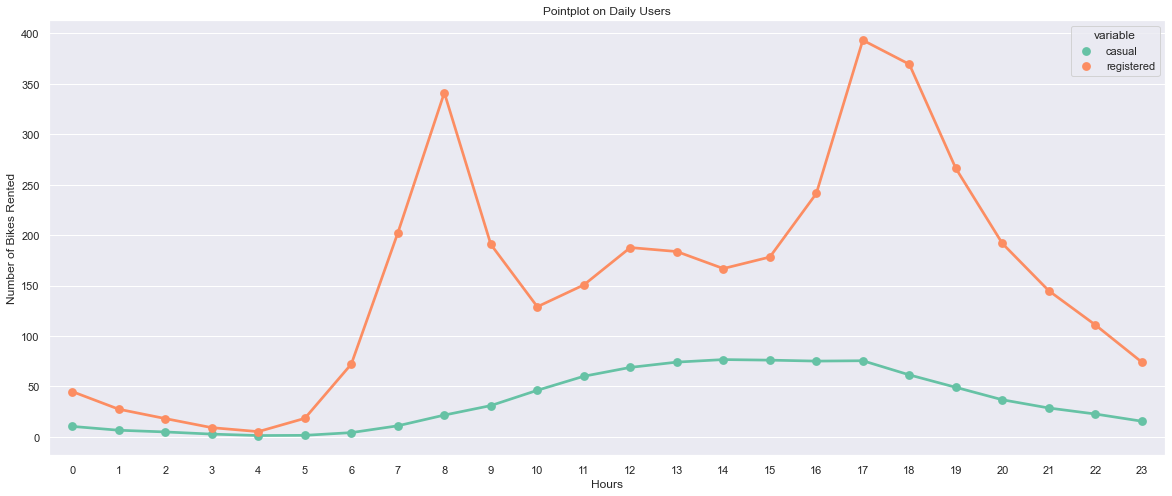

In [16]:
plt.figure(figsize = [20,8])
ax = sns.pointplot(data=hour_value_trans_group,x='hour', y='value', hue='variable',palette ='Set2' )
ax.set(title = 'Pointplot on Daily Users', xlabel='Hours', ylabel='Number of Bikes Rented')

Demand is high during rush hours in working days

In [17]:
hour_wday_group = bike_train.groupby(['hour','dow'])['count'].mean().reset_index()
hour_wday_group['dow'] = hour_wday_group['dow'].astype(str)
hour_wday_group['dow'] = hour_wday_group['dow'].replace(to_replace=['0','1','2','3','4', '5', '6'],
                                                      value=['Sun', 'Mon','Tue','Wed','Thu', 'Fri', 'Sat'])
hour_wday_group

,hour,dow,count
0,0,Sun,35.492308
1,0,Mon,27.328125
2,0,Tue,36.246154
3,0,Wed,37.476923
4,0,Thu,53.234375
...,...,...,...
163,23,Tue,80.138462
164,23,Wed,99.630769
165,23,Thu,119.546875
166,23,Fri,120.030303


[Text(0, 0.5, 'Number of Bikes Rented'),
 Text(0.5, 0, 'Hours'),
 Text(0.5, 1.0, 'Pointplot on Hourly Rentals per DOW')]

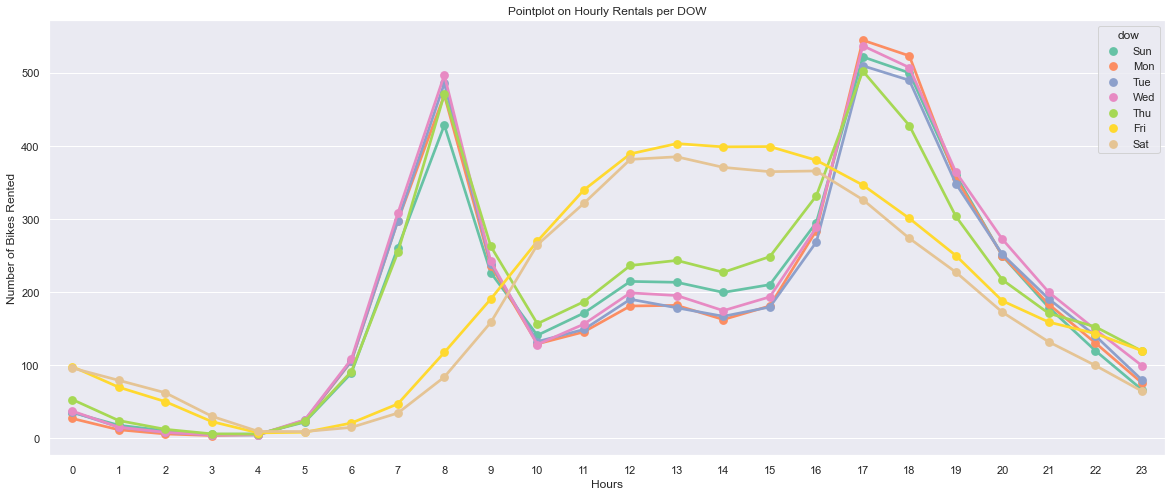

In [18]:
plt.figure(figsize = [20,8])
ax=sns.pointplot(data=hour_wday_group,x='hour', y='count', hue='dow', palette='Set2')
ax.set(title = 'Pointplot on Hourly Rentals per DOW', xlabel='Hours', ylabel='Number of Bikes Rented')

Demand is high during rush hours across seasons

In [19]:
hour_group = bike_train.groupby(['hour','season'])['count'].mean().reset_index()
hour_group = clarify_seasons(hour_group)
hour_group

,hour,season,count
0,0,Winter,28.292035
1,0,Spring,58.473684
2,0,Summer,75.675439
3,0,Autumn,57.877193
4,1,Winter,18.761062
...,...,...,...
91,22,Autumn,126.412281
92,23,Winter,45.333333
93,23,Spring,101.684211
94,23,Summer,121.719298


[Text(0, 0.5, 'Number of Bikes Rented'),
 Text(0.5, 0, 'Hours'),
 Text(0.5, 1.0, 'Pointplot on Hourly Rentals per Season')]

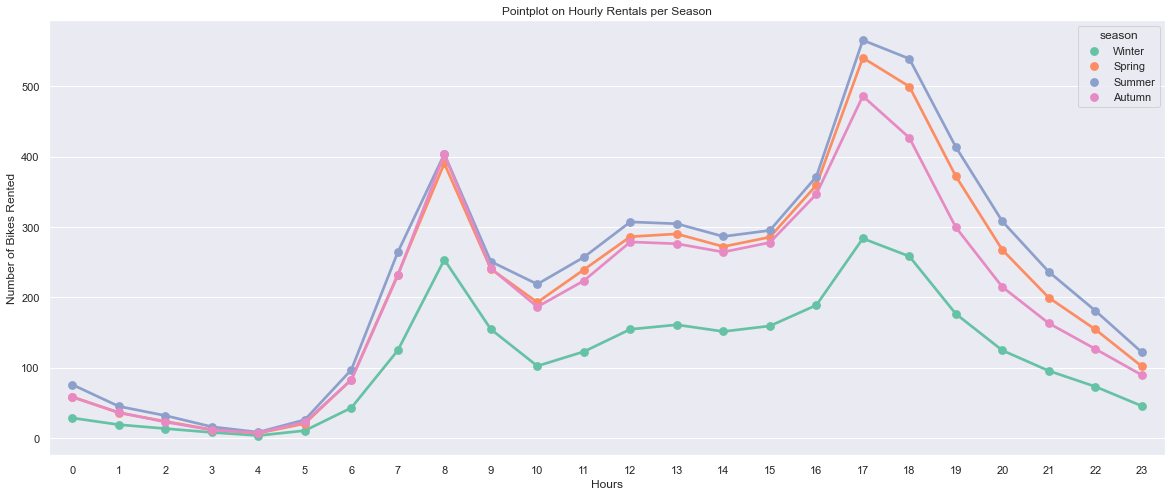

In [20]:
plt.figure(figsize = [20,8])
ax = sns.pointplot(data=hour_group,x='hour', y='count', hue='season',palette ='Set2' )
ax.set(title = 'Pointplot on Hourly Rentals per Season', xlabel='Hours', ylabel='Number of Bikes Rented')

Demand is high during good weather (fair and misty)

In [21]:
hour_group = bike_train.groupby(['hour','weather'])['count'].mean().reset_index()
hour_group = clarify_weather(hour_group)
hour_group

,hour,weather,count
0,0,Fair,59.914474
1,0,Misty,49.642276
2,0,Rainy,27.428571
3,1,Fair,35.125000
4,1,Misty,35.383333
...,...,...,...
68,22,Misty,116.247619
69,22,Rainy,77.787879
70,23,Fair,95.325806
71,23,Misty,84.902913


[Text(0, 0.5, 'Number of Bikes Rented'),
 Text(0.5, 0, 'Hours'),
 Text(0.5, 1.0, 'Pointplot on Hourly Rentals per Weather')]

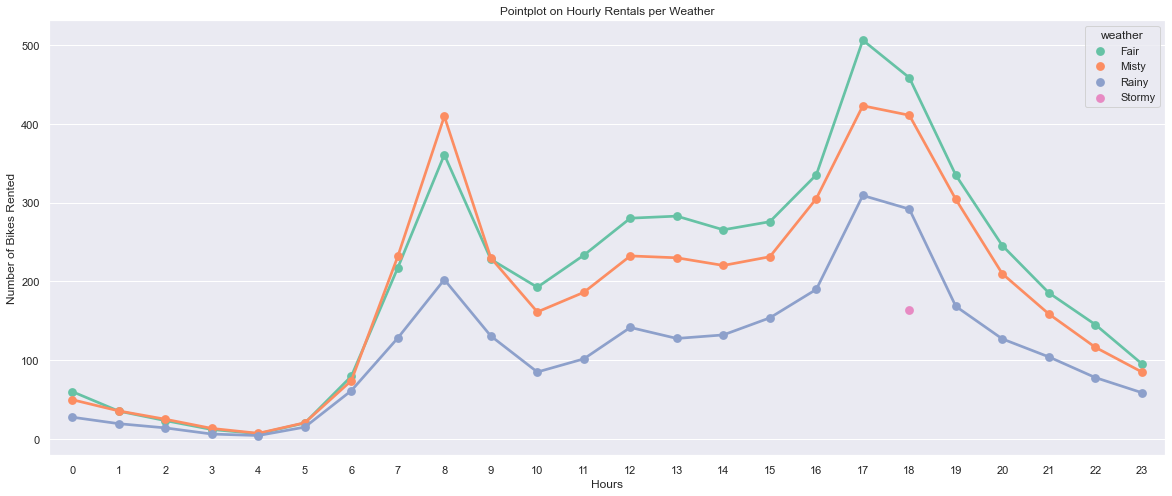

In [22]:
plt.figure(figsize = [20,8])
ax = sns.pointplot(data=hour_group,x='hour', y='count', hue='weather', palette ='Set2' )
ax.set(title = 'Pointplot on Hourly Rentals per Weather', xlabel='Hours', ylabel='Number of Bikes Rented')

Demand is high in Summer months (June, July, August)

In [23]:
month_group = bike_train.groupby('month')['count'].mean().reset_index()
month_group['month'] = month_group['month'].astype(str)
month_group['month'] = month_group['month'].replace(to_replace=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                                                  value=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
month_group

,month,count
0,Jan,90.366516
1,Feb,110.003330
2,Mar,148.169811
3,Apr,184.160616
4,May,219.459430
5,Jun,242.031798
6,Jul,235.325658
7,Aug,234.118421
8,Sep,233.805281
9,Oct,227.699232


[Text(0, 0.5, 'Number of Bikes Rented'),
 Text(0.5, 0, 'Months'),
 Text(0.5, 1.0, 'Barplot on Rentals per Month')]

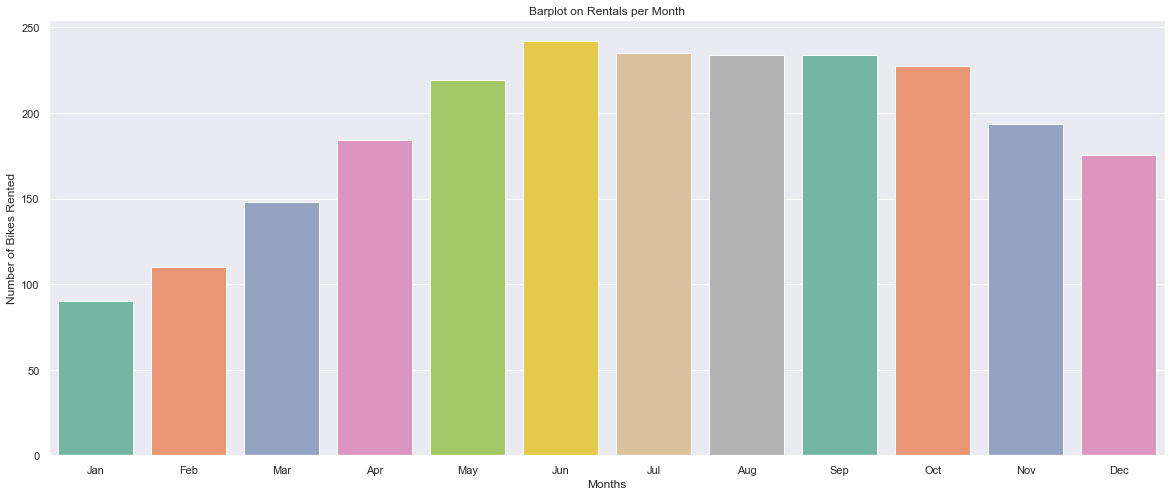

In [24]:
plt.figure(figsize = [20,8])
ax = sns.barplot(data=month_group, x='month', palette ='Set2', y='count')
ax.set(title = 'Barplot on Rentals per Month', xlabel='Months', ylabel='Number of Bikes Rented')

### Feature Engineering

In [25]:
bike_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
dow           0
week          0
month         0
year          0
weekend       0
dtype: int64

One hot coding (Season and Weather)

In [26]:
bike_train_clean = clarify_seasons(bike_train)
season = pd.get_dummies(bike_train['season'], drop_first=True)
bike_train_clean = clarify_weather(bike_train)
weather = pd.get_dummies(bike_train['weather'], drop_first=True)

In [27]:
#concat bike_train with dummy season and weather 

bike_train_concat = pd.concat([bike_train, season, weather], axis=1)

In [28]:
#drop columns not needed

bike_train_concat.drop(['datetime', 'atemp','casual','registered', 'season', 'weather'], axis=1, inplace=True)
bike_train_concat

,holiday,workingday,temp,humidity,windspeed,count,hour,day,dow,week,month,year,weekend,Spring,Summer,Winter,Misty,Rainy,Stormy
0,0,0,9.84,81,0.0000,16,0,1,5,52,1,2011,1,0,0,1,0,0,0
1,0,0,9.02,80,0.0000,40,1,1,5,52,1,2011,1,0,0,1,0,0,0
2,0,0,9.02,80,0.0000,32,2,1,5,52,1,2011,1,0,0,1,0,0,0
3,0,0,9.84,75,0.0000,13,3,1,5,52,1,2011,1,0,0,1,0,0,0
4,0,0,9.84,75,0.0000,1,4,1,5,52,1,2011,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,26.0027,336,19,19,2,51,12,2012,0,0,0,0,0,0,0
10882,0,1,14.76,57,15.0013,241,20,19,2,51,12,2012,0,0,0,0,0,0,0
10883,0,1,13.94,61,15.0013,168,21,19,2,51,12,2012,0,0,0,0,0,0,0
10884,0,1,13.94,61,6.0032,129,22,19,2,51,12,2012,0,0,0,0,0,0,0


In [29]:
model_train = bike_train_concat.copy() #modeling dataframe

Correlation Analysis

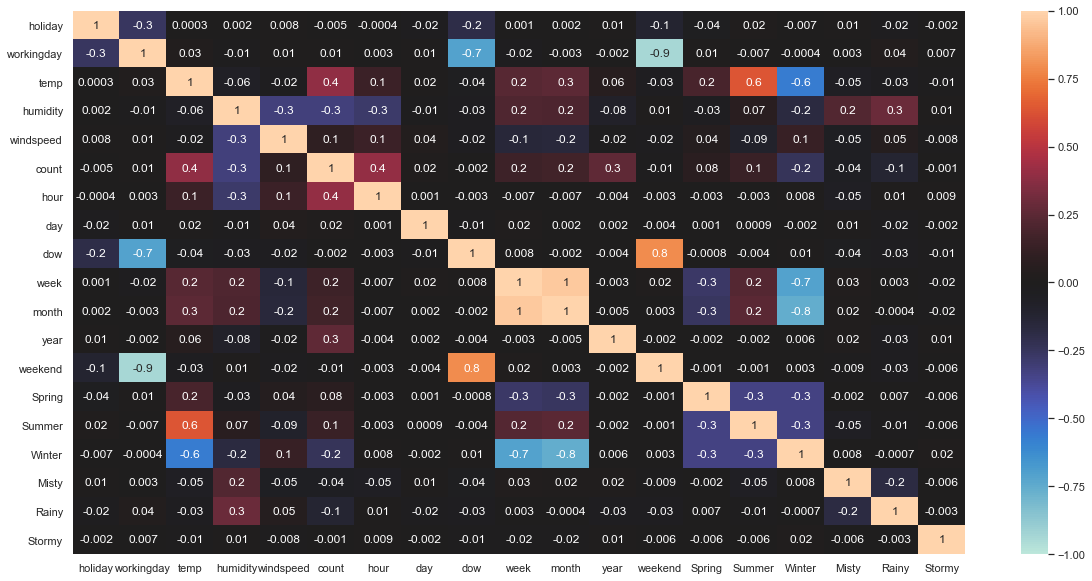

In [30]:
plt.figure(figsize = [20,10])

sns.heatmap(model_train.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)

### 7. Split dataset ot X and Y variables

In [31]:
model_train

,holiday,workingday,temp,humidity,windspeed,count,hour,day,dow,week,month,year,weekend,Spring,Summer,Winter,Misty,Rainy,Stormy
0,0,0,9.84,81,0.0000,16,0,1,5,52,1,2011,1,0,0,1,0,0,0
1,0,0,9.02,80,0.0000,40,1,1,5,52,1,2011,1,0,0,1,0,0,0
2,0,0,9.02,80,0.0000,32,2,1,5,52,1,2011,1,0,0,1,0,0,0
3,0,0,9.84,75,0.0000,13,3,1,5,52,1,2011,1,0,0,1,0,0,0
4,0,0,9.84,75,0.0000,1,4,1,5,52,1,2011,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,26.0027,336,19,19,2,51,12,2012,0,0,0,0,0,0,0
10882,0,1,14.76,57,15.0013,241,20,19,2,51,12,2012,0,0,0,0,0,0,0
10883,0,1,13.94,61,15.0013,168,21,19,2,51,12,2012,0,0,0,0,0,0,0
10884,0,1,13.94,61,6.0032,129,22,19,2,51,12,2012,0,0,0,0,0,0,0


In [32]:
model_train.head(5)

,holiday,workingday,temp,humidity,windspeed,count,hour,day,dow,week,month,year,weekend,Spring,Summer,Winter,Misty,Rainy,Stormy
0,0,0,9.84,81,0.0,16,0,1,5,52,1,2011,1,0,0,1,0,0,0
1,0,0,9.02,80,0.0,40,1,1,5,52,1,2011,1,0,0,1,0,0,0
2,0,0,9.02,80,0.0,32,2,1,5,52,1,2011,1,0,0,1,0,0,0
3,0,0,9.84,75,0.0,13,3,1,5,52,1,2011,1,0,0,1,0,0,0
4,0,0,9.84,75,0.0,1,4,1,5,52,1,2011,1,0,0,1,0,0,0


In [33]:
X = model_train.drop(['count'], axis=1)
y = model_train['count']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 15)

In [35]:
X_train.shape, y_train.shape

((8708, 18), (8708,))

In [36]:
X_test.shape, y_test.shape

((2178, 18), (2178,))

### 5. Models


Root Mean Squared Logarithmic Error


In [37]:
def rmsle(prediction, actual):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in prediction]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#### Linear Regression Model

In [38]:
linear = linear_model.LinearRegression() # Create linear regression object

In [39]:
linear.fit(X_train, y_train) # Train the model using the training sets

LinearRegression()

In [40]:
#prepare prediction result
prediction = linear.predict(X_test)
i = 0
for v in prediction:
    if prediction[i] < 0:
        prediction[i] = 0
    i = i + 1

In [41]:
print('Coefficients:', linear.coef_) # The coefficients
print('Intercept:', linear.intercept_) # The intercept
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, prediction))# The mean squared error
print('Coefficient of determination (R^2): %.2f' # The coefficient of determination: 1 is perfect prediction
      % r2_score(y_test, prediction))


print("train score :", linear.score(X_train, y_train))
print("test score  :", linear.score(X_test, y_test))

Coefficients: [ -2.04664776   4.22798778   8.16843022  -1.9641938    0.2884154
   7.81785227   0.46510726   1.74389355  -0.39541333  10.46373964
  80.30047605  -2.18134003   5.78957975 -42.68819315   5.77652874
   9.23802488 -28.67213953  67.35602364]
Intercept: -161532.29045212668
Mean squared error (MSE): 19027.30
Coefficient of determination (R^2): 0.40
train score : 0.3985052705695584
test score  : 0.38979163980995246


RMSLE:  1.309873986189905


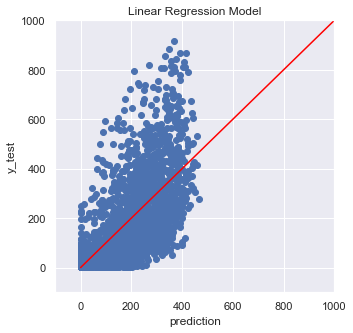

In [42]:
#visualize Linear Regression Model

plt.figure(figsize=(5, 5))
plt.scatter(prediction, y_test)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction')
plt.ylabel('y_test')
plt.title('Linear Regression Model')

print("RMSLE: ", rmsle(prediction, y_test))

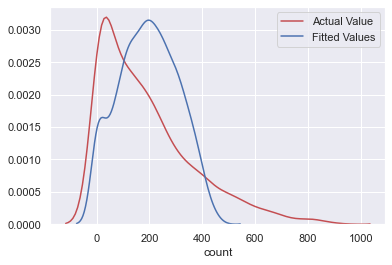

In [43]:
#Plotting actual vs predicted outputs
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)



The model is not a good fit.

#### Polynomial Linear Regression Model

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [45]:
X = model_train.drop(['count'], axis=1)
y = model_train['count'] + np.random.randn(len(model_train))*0.5

# Train Test Split (again?)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35)

In [46]:
DEGREE = 2
poly = PolynomialFeatures(degree=DEGREE)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [47]:
m = LinearRegression()
m.fit(X_train_poly, y_train)

# And the predictions
ypred_train_log = m.predict(X_train_poly)
ypred_test_log = m.predict(X_test_poly)

In [48]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, ypred_train_log))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, ypred_test_log))

Mean squared error (MSE): 14415.98
Coefficient of determination (R^2): 0.57


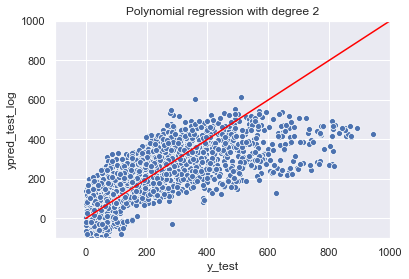

In [49]:
plt.figure()
sns.scatterplot(y_test, ypred_test_log)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('y_test')
plt.ylabel('ypred_test_log')

plt.title("Polynomial regression with degree "+str(DEGREE))
plt.show()


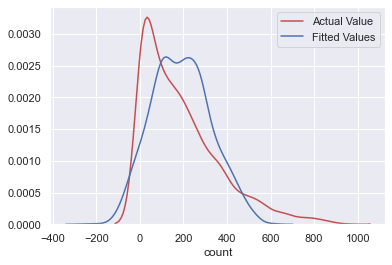

In [50]:
#Plotting actual vs predicted outputs
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(ypred_test_log, hist=False, color="b", label="Fitted Values" , ax=ax1)

#### Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor


In [52]:
model_train

,holiday,workingday,temp,humidity,windspeed,count,hour,day,dow,week,month,year,weekend,Spring,Summer,Winter,Misty,Rainy,Stormy
0,0,0,9.84,81,0.0000,16,0,1,5,52,1,2011,1,0,0,1,0,0,0
1,0,0,9.02,80,0.0000,40,1,1,5,52,1,2011,1,0,0,1,0,0,0
2,0,0,9.02,80,0.0000,32,2,1,5,52,1,2011,1,0,0,1,0,0,0
3,0,0,9.84,75,0.0000,13,3,1,5,52,1,2011,1,0,0,1,0,0,0
4,0,0,9.84,75,0.0000,1,4,1,5,52,1,2011,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,26.0027,336,19,19,2,51,12,2012,0,0,0,0,0,0,0
10882,0,1,14.76,57,15.0013,241,20,19,2,51,12,2012,0,0,0,0,0,0,0
10883,0,1,13.94,61,15.0013,168,21,19,2,51,12,2012,0,0,0,0,0,0,0
10884,0,1,13.94,61,6.0032,129,22,19,2,51,12,2012,0,0,0,0,0,0,0


In [53]:
X = model_train.drop(['count'], axis=1)
y = model_train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 15)

In [54]:
random = RandomForestRegressor().fit(X_train, y_train)
prediction_random = random.predict(X_train)

In [55]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, prediction))# The mean squared error
print('Coefficient of determination (R^2): %.2f' # The coefficient of determination: 1 is perfect prediction
      % r2_score(y_test, prediction))

print("train score :", linear.score(X_train, y_train))
print("test score  :", linear.score(X_test, y_test))

Mean squared error (MSE): 19027.30
Coefficient of determination (R^2): 0.40
train score : 0.3985052705695584
test score  : 0.38979163980995246


RMSLE:  0.1528569475100679


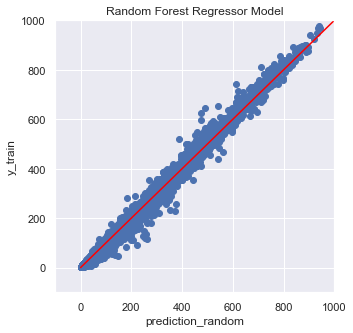

In [56]:
plt.figure(figsize=(5, 5))
plt.scatter(prediction_random, y_train)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction_random')
plt.ylabel('y_train')
plt.title('Random Forest Regressor Model')

print("RMSLE: ", rmsle(prediction_random, y_train))

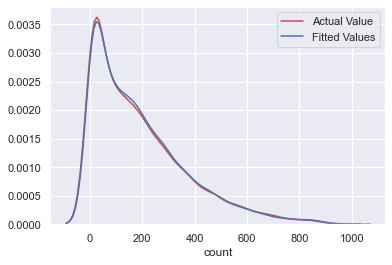

In [57]:
#Plotting actual vs predicted outputs
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(prediction_random, hist=False, color="b", label="Fitted Values" , ax=ax1)

#### Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor


In [59]:
model_train
X = model_train.drop(['count'], axis=1)
y = model_train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 15)

In [60]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_train_pred2 = clf.predict(X_train)
y_test_pred2 = clf.predict(X_test)

In [61]:
print('RMSLE train: %.2f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred2 + 1))))
print('RMSLE test: %.2f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_pred2 + 1))))
print('R2 train: %.2f' % r2_score(y_train, y_train_pred2))
print('R2 test: %.2f' % r2_score(y_test, y_test_pred2))

print("train score :", linear.score(X_train, y_train))
print("test score  :", linear.score(X_test, y_test))

RMSLE train: 0.00
RMSLE test: 0.43
R2 train: 1.00
R2 test: 0.90
train score : 0.3985052705695584
test score  : 0.38979163980995246


RMSLE:  0.0


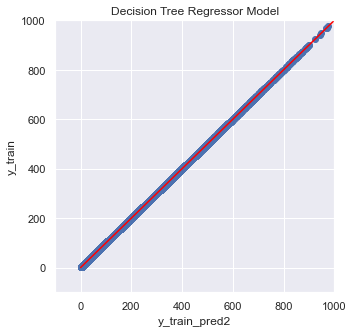

In [62]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train_pred2, y_train)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('y_train_pred2')
plt.ylabel('y_train')
plt.title('Decision Tree Regressor Model')

print("RMSLE: ", rmsle(y_train_pred2, y_train))

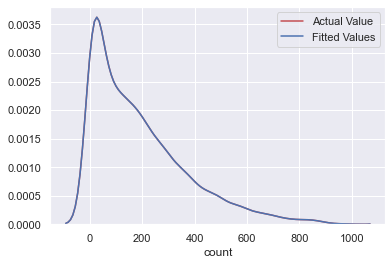

In [63]:
#Plotting actual vs predicted outputs
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_train_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)

#### Ridge Regression

In [64]:
model_train
X = model_train.drop(['count'], axis=1)
y = model_train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 15)

In [65]:
ridge = Ridge(alpha = 0.10)
ridge.fit(X_train, y_train)
predict_train_ridge = ridge.predict(X_train)

In [66]:
print(np.sqrt(mean_squared_error(y_train,predict_train_ridge)))
print(r2_score(y_train, predict_train_ridge))
predict_test_ridge= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,predict_test_ridge)))
print(r2_score(y_test, predict_test_ridge))

141.11047490479393
0.3985051401475205
138.93166174564897
0.3897918922180411


RMSLE: 

<ipython-input-37-9bd1418e7d4a>:2: RuntimeWarning: invalid value encountered in log
  log1 = np.nan_to_num(np.array([np.log(v + 1) for v in prediction]))


 1.299153470579953


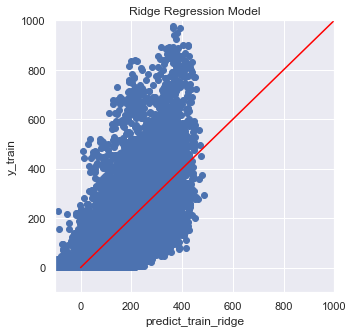

In [67]:
plt.figure(figsize=(5, 5))
plt.scatter(predict_train_ridge, y_train)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('predict_train_ridge')
plt.ylabel('y_train')
plt.title('Ridge Regression Model')

print("RMSLE: ", rmsle(predict_train_ridge, y_train))

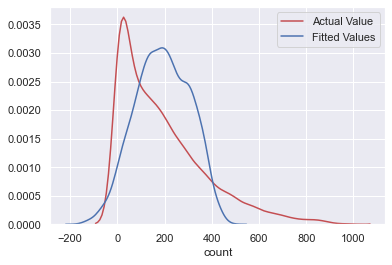

In [68]:
#Plotting actual vs predicted outputs
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(predict_train_ridge, hist=False, color="b", label="Fitted Values" , ax=ax1)

Lasso Regression

In [69]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

141.11240419069267
0.3984886925594159
138.93196708943975
0.38978920998622724


RMSLE: 

<ipython-input-37-9bd1418e7d4a>:2: RuntimeWarning: invalid value encountered in log
  log1 = np.nan_to_num(np.array([np.log(v + 1) for v in prediction]))


 1.2974208223345587


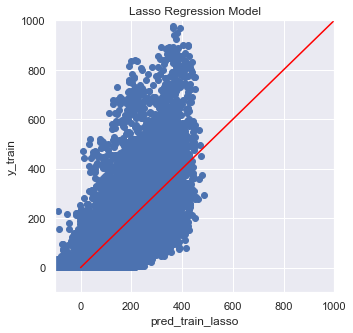

In [70]:
plt.figure(figsize=(5, 5))
plt.scatter(pred_train_lasso, y_train)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('pred_train_lasso')
plt.ylabel('y_train')
plt.title('Lasso Regression Model')

print("RMSLE: ", rmsle(pred_train_lasso, y_train))

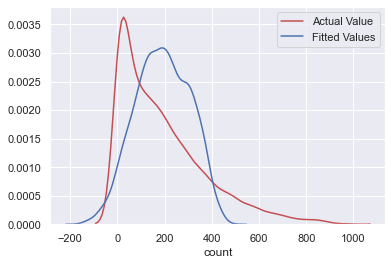

In [71]:
#Plotting actual vs predicted outputs
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(pred_train_lasso, hist=False, color="b", label="Fitted Values" , ax=ax1)